In [1]:
import pandas as pd
import numpy as np

'**********************************Import Data*****************************************'

Data = pd.read_csv("C:\\Users\\Abhiruchi\\Downloads\\usahousing\\USA_Housing.csv")
Train = Data[: int(.70*(len(Data)))]
Test = Data[int(.70*(len(Data))) :]

In [2]:
Train.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [3]:
Train


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386
5,80175.75416,4.988408,6.104512,4.04,26748.42842,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
6,64698.46343,6.025336,8.147760,3.41,60828.24909,1.502056e+06,"4759 Daniel Shoals Suite 442\nNguyenburgh, CO ..."
7,78394.33928,6.989780,6.620478,2.42,36516.35897,1.573937e+06,"972 Joyce Viaduct\nLake William, TN 17778-6483"
8,59927.66081,5.362126,6.393121,2.30,29387.39600,7.988695e+05,USS Gilbert\nFPO AA 20957
9,81885.92718,4.423672,8.167688,6.10,40149.96575,1.545155e+06,Unit 9446 Box 0958\nDPO AE 97025


# '***************normalize data***************'

In [ ]:
TrainAvgAreaIncome = np.array(Train['Avg. Area Income'])/ max(Train['Avg. Area Income'])
TrainAvgAreaHouseAge = np.array(Train['Avg. Area House Age'])/ max(Train['Avg. Area House Age'])
TrainPrice = np.array(Train['Price'])/ max(Train['Price'])

# '**************calculate z axis values ****************'

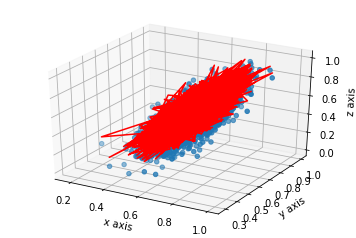

In [4]:
m = .3
n = .3
c = 0
z = (m * (TrainAvgAreaIncome**2)) + (n * (TrainAvgAreaHouseAge**2)) + c 
z = z/max(z)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax =  fig.add_subplot(111, projection = '3d')
ax.scatter(TrainAvgAreaIncome, TrainAvgAreaHouseAge, TrainPrice)
ax.plot(TrainAvgAreaIncome, TrainAvgAreaHouseAge, z, c = 'r')

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")

plt.show()

# Calculate Thetas Using Gradient Descent

In [5]:
Theta1Old = m
Theta2Old = n
Theta3Old = c
Theta1Gradient = []
Theta2Gradient = []
Theta3Gradient = []
alpha = .001
for i in range(10000):
    Theta1New = Theta1Old - ((alpha*2*(sum((((Theta1Old*(TrainAvgAreaIncome**2))+(Theta2Old * (TrainAvgAreaHouseAge**2)) + Theta3Old) - TrainPrice) * TrainAvgAreaIncome)))/len(Train))
    Theta2New = Theta2Old - ((alpha*2*(sum((((Theta1Old*(TrainAvgAreaIncome**2))+(Theta2Old * (TrainAvgAreaHouseAge**2)) + Theta3Old) - TrainPrice) * TrainAvgAreaHouseAge)))/len(Train))
    Theta3New = Theta3Old - ((alpha*2*(sum(((Theta1Old*(TrainAvgAreaIncome**2))+(Theta2Old * (TrainAvgAreaHouseAge**2)) + Theta3Old) - TrainPrice)))/len(Train))
    print(Theta1New,Theta2New,Theta3New)
    if Theta1Old == Theta1New:
        break
    Theta1Gradient.append(Theta1New)
    Theta2Gradient.append(Theta2New)
    Theta3Gradient.append(Theta3New)
    Theta1Old = Theta1New
    Theta2Old = Theta2New
    Theta3Old = Theta3New
    

0.30032179770601275 0.3003245207762812 0.0004879113667599464
0.3006426127501604 0.30064802870075613 0.0009742927519182683
0.3009624481965078 0.3009705269322001 0.0014591489269698656
0.30128130709956424 0.30129201861953764 0.0019424846485293639
0.30159919250431333 0.301612506901873 0.0024243046583775248
0.30191610744624264 0.30193199490852096 0.002904613683507506
0.30223205495137345 0.3022504857590372 0.0033834164361709776
0.30254703803629 0.3025679825632489 0.0038607176139240904
0.3028610597081693 0.302884488421285 0.004336521899673308
0.3031741229648101 0.30320000642360645 0.0048108339617210965
0.3034862307946624 0.3035145396510363 0.005283658453811461
0.3037973861768564 0.3038280911747899 0.005755000015175349
0.3041075920812318 0.30414066405650475 0.00622486327057592
0.30441685146836645 0.3044522613482703 0.006693252830353649
0.30472516728960564 0.30476288609265795 0.007160173290471317
0.3050325424870905 0.3050725413227506 0.00762562923255884
0.305338979993787 0.3053812300621721 0.00

0.3461328376774962 0.34620398501918814 0.06936193805042766
0.3463146859669982 0.3463842651497551 0.06963196337340426
0.34649598795481873 0.346563982276408 0.0699011382335678
0.3466767453442021 0.3467431381550364 0.07016946528328195
0.346856959833081 0.346921734536054 0.07043694716663872
0.34703663311409294 0.34709977316441576 0.07070358651948434
0.3472157668745968 0.34727725577963475 0.07096938596944496
0.34739436279668945 0.3474541841157993 0.07123434813595227
0.3475724225572218 0.34763055990158986 0.07149847563026905
0.3477499478278156 0.3478063848602958 0.07176177105551468
0.3479269402748794 0.34798166070983233 0.0720242370066905
0.348103401559625 0.34815638916275715 0.07228587607070514
0.3482793333380835 0.3483305719262873 0.07254669082639975
0.34845473726112164 0.34850421070231563 0.07280668384457319
0.3486296149744578 0.3486773071874275 0.07306585768800705
0.34880396811867814 0.3488498630729175 0.07332421491149074
0.3489777983292524 0.34902188004480555 0.07358175806184632
0.34915

0.3701878643698972 0.3697973641900892 0.10461481115425465
0.3702981844932749 0.36990393608833205 0.10477349366767796
0.37040818130738545 0.3700101748673237 0.10493167297123945
0.3705178558200561 0.3701160815660401 0.10508935063436775
0.370627209035971 0.3702216572202171 0.10524652822159712
0.37073624195668137 0.37032690286236053 0.10540320729258269
0.37084495558061475 0.37043181952175624 0.10555938940211569
0.37095335090308523 0.37053640822448014 0.10571507610013861
0.37106142891630284 0.37064066999340833 0.10587026893176034
0.37116919060938336 0.3707446058482269 0.1060249694372712
0.37127663696835794 0.370848216805442 0.10617917915215802
0.37138376897618275 0.3709515038783897 0.10633289960711909
0.3714905876127485 0.37105446807724596 0.10648613232807909
0.3715970938548901 0.3711571104090364 0.106638878836204
0.3717032886763961 0.3712594318776461 0.10679114064791591
0.3718091730480183 0.3713614334838295 0.10694291927490784
0.371914747937481 0.37146311622522005 0.1070942162241585
0.3720

0.38613699391241785 0.38490408184218355 0.12700394091821626
0.38620144483167546 0.38496340097424137 0.1270912427217642
0.38626571540666277 0.38502253437041956 0.12717826394598136
0.3863298061993616 0.3850814826100669 0.12726500546600583
0.3863937177700012 0.38514024627072546 0.1273514681542465
0.38645745067706383 0.3851988259281361 0.1274376528803916
0.38652100547729 0.3852572221562443 0.12752356051141717
0.386584382725684 0.3853154355272056 0.12760919191159548
0.3866475829755194 0.3853734666113912 0.12769454794250354
0.3867106067783441 0.3854313159773936 0.12777962946303148
0.3867734546839863 0.38548898419203204 0.12786443732939085
0.3868361272405592 0.38554647182035806 0.1279489723951231
0.386898624994467 0.38560377942566115 0.1280332355111078
0.38696094849040963 0.3856609075694741 0.128117227525571
0.38702309827138853 0.3857178568115784 0.1282009492840935
0.3870850748787117 0.38577462771001 0.1282844016296191
0.38714687885199894 0.38583122082106436 0.1283675854024628
0.3872085107291

0.39522385160239737 0.39300662492658545 0.1388331051866451
0.3952636334607499 0.39304054495688234 0.13888203757065645
0.3953033118298188 0.39307435848113603 0.13893080905642052
0.3953428870319097 0.39310806583161007 0.13897942014584053
0.3953823593883228 0.393141667339532 0.13902787133925443
0.3954217292193566 0.3931751633350962 0.13907616313543986
0.3954609968443106 0.3932085541474675 0.139124296031619
0.3955001625814885 0.3932418401047841 0.1391722705234634
0.3955392267482015 0.3932750215341608 0.13922008710509878
0.3955781896607712 0.39330809876169237 0.13926774626910993
0.3956170516345326 0.39334107211245667 0.13931524850654545
0.3956558129838375 0.39337394191051767 0.13936259430692258
0.3956944740220573 0.3934067084789287 0.13940978415823196
0.3957330350615862 0.3934393721397358 0.13945681854694242
0.395771496413844 0.3934719332139804 0.13950369795800563
0.39580985838927957 0.3935043920217029 0.13955042287486094
0.3958481212973734 0.3935367488819457 0.13959699377944004
0.395886285

0.40057095637674706 0.39735843582987096 0.1450284221438297
0.40059743114101115 0.39737866724846793 0.14505667467686162
0.4006238438441801 0.3973988348690289 0.14508483082459586
0.4006501946793641 0.3974189388906285 0.14511289088774681
0.40067648383907095 0.3974389795117206 0.14514085516609104
0.40070271151520837 0.3974589569301401 0.14516872395847025
0.40072887789908546 0.397478871343105 0.14519649756279415
0.40075498318141467 0.39749872294721816 0.14522417627604345
0.4007810275523138 0.3975185119384694 0.14525176039427262
0.4008070112013078 0.39753823851223724 0.14527925021261295
0.4008329343173304 0.397557902863291 0.1453066460252753
0.40085879708872635 0.39757750518579255 0.14533394812555298
0.4008845997032529 0.39759704567329823 0.1453611568058247
0.40091034234808187 0.39761652451876073 0.14538827235755733
0.40093602520980126 0.39763594191453105 0.14541529507130874
0.4009616484744173 0.3976552980523603 0.14544222523673073
0.4009872123273561 0.39767459312340153 0.1454690631425718
0.

0.4045874840329848 0.4001957855844832 0.14888713801440723
0.40460521856313764 0.40020704008359337 0.14890182769008956
0.40462291820950735 0.4002182588011815 0.14891646330120217
0.40464058308045137 0.4002294418489497 0.14893104501647872
0.40465821328398915 0.40024058933825174 0.1489455730041266
0.4046758089278034 0.4002517013800941 0.14896004743182872
0.40469337011924095 0.40026277808513705 0.14897446846674495
0.4047108969653139 0.40027381956369584 0.1489888362755139
0.4047283895727007 0.40028482592574166 0.14900315102425454
0.40474584804774694 0.40029579728090264 0.14901741287856773
0.40476327249646676 0.40030673373846515 0.14903162200353792
0.4047806630245436 0.40031763540737464 0.14904577856373474
0.4047980197373313 0.40032850239623685 0.14905988272321455
0.4048153427398553 0.40033933481331885 0.14907393464552213
0.40483263213681336 0.40035013276655 0.1490879344936922
0.4048498880325769 0.4003608963635231 0.14910188243025108
0.4048671105311916 0.4003716257114954 0.14911577861721817
0

0.40717814796578894 0.40167432143284504 0.1507274920981826
0.407191268998593 0.40168085045262764 0.15073504121479092
0.40720436946214406 0.4016873584470863 0.15074255855713703
0.40721744942016025 0.40169384548190396 0.15075004422444022
0.40723050893616103 0.40170031162255876 0.15075749831561036
0.4072435480734677 0.4017067569343246 0.15076492092924887
0.4072565668952041 0.4017131814822718 0.15077231216364967
0.4072695654642974 0.40171958533126784 0.15077967211680016
0.40728254384347823 0.40172596854597775 0.1507870008863821
0.40729550209528187 0.401732331190865 0.1507942985697727
0.40730844028204843 0.401738673330192 0.15080156526404542
0.4073213584659237 0.4017449950280207 0.15080880106597103
0.4073342567088597 0.4017512963482134 0.15081600607201848
0.40734713507261516 0.40175757735443307 0.1508231803783559
0.40735999361875624 0.4017638381101442 0.1508303240808515
0.4073728324086572 0.4017700786786134 0.15083743727507454
0.40738565150350076 0.40177629912290996 0.15084452005629617
0.40

0.4092824548247401 0.4025730676992424 0.151663837443104
0.4092927100084697 0.40257667491894167 0.15166697043424282
0.4093029534824575 0.4025802702458187 0.15167008544656296
0.4093131852827944 0.40258385371707517 0.15167318253626125
0.40932340544545875 0.4025874253697967 0.15167626175935925
0.4093336140063165 0.40259098524095327 0.15167932317170385
0.409343811001122 0.40259453336739953 0.15168236682896774
0.4093539964655179 0.40259806978587526 0.15168539278665
0.40936417043503587 0.40260159453300565 0.15168840110007661
0.4093743329450967 0.4026051076453016 0.15169139182440106
0.4093844840310107 0.4026086091591602 0.15169436501460476
0.40939462372797814 0.402612099110865 0.15169732072549774
0.4094047520710895 0.4026155775365864 0.15170025901171905
0.4094148690953258 0.402619044472382 0.15170317992773732
0.40942497483555906 0.40262249995419697 0.1517060835278514
0.4094350693265525 0.40262594401786433 0.1517089698661907
0.40944515260296094 0.40262937669910537 0.1517118389967159
0.409455224

0.41092668513397224 0.40305197372370877 0.15198175409306022
0.4109353537392308 0.4030539765537452 0.15198246113117345
0.41094401550805065 0.40305597251406994 0.1519831577784494
0.41095267046132655 0.4030579616262189 0.15198384406742085
0.41096131861988805 0.40305994391166067 0.15198452003051918
0.4109699600044998 0.4030619193917971 0.1519851857000746
0.41097859463586167 0.40306388808796306 0.15198584110831648
0.410987222534609 0.4030658500214271 0.1519864862873737
0.41099584372131276 0.40306780521339125 0.15198712126927497
0.4110044582164798 0.4030697536849916 0.15198774608594903
0.41101306604055304 0.40307169545729815 0.15198836076922512
0.41102166721391165 0.4030736305513153 0.1519889653508332
0.4110302617568712 0.40307555898798186 0.15198955986240426
0.41103884968968396 0.4030774807881714 0.15199014433547064
0.4110474310325391 0.4030793959726923 0.15199071880146636
0.4110560058055628 0.40308130456228825 0.15199128329172742
0.4110645740288184 0.40308320657763796 0.15199183783749207
0

0.41236347249759364 0.4033155747658741 0.1519716985580997
0.4123712085510103 0.4033166474814745 0.15197099821194215
0.41237894060152863 0.4033177162476579 0.15197029188651634
0.4123866686612085 0.4033187810768521 0.1519695796005969
0.41239439274207207 0.40331984198144616 0.15196886137289997
0.41240211285610406 0.4033208989737906 0.1519681372220833
0.4124098290152518 0.40332195206619725 0.15196740716674645
0.4124175412314254 0.4033230012709397 0.15196667122543098
0.4124252495164978 0.4033240466002531 0.15196592941662063
0.41243295388230494 0.40332508806633466 0.1519651817587415
0.4124406543406459 0.40332612568134335 0.1519644282701622
0.4124483509032829 0.4033271594574003 0.1519636689691941
0.41245604358194154 0.40332818940658877 0.15196290387409142
0.41246373238831086 0.4033292155409544 0.15196213300305145
0.4124714173340434 0.40333023787250527 0.15196135637421473
0.4124790984307555 0.403331256413212 0.15196057400566526
0.41248677569002706 0.40333227117500775 0.1519597859154306
0.41249

0.41367283551304646 0.40345330220702214 0.1517710871442476
0.4136800232769074 0.403453840802011 0.15176957763785956
0.41368720867335407 0.40345437713279114 0.15176806469810833
0.4136943917093476 0.4034549112065341 0.15176654833582867
0.41370157239182725 0.40345544303038905 0.15176502856182153
0.4137087507277109 0.40345597261148286 0.1517635053868542
0.4137159267238947 0.40345649995692023 0.15176197882166037
0.41372310038725324 0.4034570250737836 0.15176044887694026
0.4137302717246399 0.4034575479691334 0.15175891556336074
0.41373744074288654 0.403458068650008 0.15175737889155538
0.41374460744880376 0.40345858712342375 0.1517558388721246
0.41375177184918094 0.40345910339637525 0.15175429551563577
0.4137589339507863 0.4034596174758352 0.15175274883262327
0.4137660937603669 0.4034601293687545 0.15175119883358867
0.4137732512846488 0.40346063908206253 0.15174964552900078
0.4137804065303372 0.4034611466226669 0.15174808892929573
0.4137875595041163 0.40346165199745376 0.15174652904487712
0.4

0.41488629324928866 0.40351814587668217 0.15146694939240066
0.4148931588183083 0.4035183827620836 0.15146498188772367
0.4149000229518583 0.4035186183432158 0.15146301240002502
0.4149068856539951 0.40351885262425574 0.15146104093561613
0.4149137469287624 0.40351908560936756 0.15145906750078877
0.41492060678019127 0.40351931730270224 0.15145709210181507
0.4149274652123004 0.40351954770839793 0.1514551147449476
0.4149343222290958 0.40351977683057977 0.15145313543641942
0.4149411778345711 0.40352000467336013 0.15145115418244415
0.41494803203270725 0.4035202312408385 0.15144917098921606
0.4149548848274731 0.4035204565371016 0.1514471858629101
0.414961736222825 0.40352068056622337 0.15144519880968188
0.41496858622270694 0.40352090333226504 0.1514432098356679
0.41497543483105065 0.4035211248392752 0.15144121894698548
0.41498228205177556 0.40352134509128984 0.1514392261497329
0.414989127888789 0.40352156409233225 0.15143723144998938
0.41499597234598606 0.4035217818464133 0.1514352348538152
0.4

0.41598229910003465 0.4035420900979024 0.15112624810534472
0.4159889772209903 0.40354216212268046 0.15112402951032428
0.4159956544230908 0.40354223337501505 0.15112180973591466
0.41600233070878284 0.4035423038574239 0.1511195887859208
0.41600900608050567 0.4035423735724169 0.15111736666413578
0.4160156805406908 0.40354244252249616 0.15111514337434087
0.4160223540917623 0.40354251071015595 0.15111291892030554
0.4160290267361366 0.40354257813788275 0.15111069330578747
0.4160356984762227 0.40354264480815527 0.15110846653453266
0.4160423693144219 0.40354271072344455 0.15110623861027542
0.41604903925312825 0.40354277588621384 0.1511040095367384
0.4160557082947282 0.40354284029891874 0.1511017793176326
0.4160623764416008 0.4035429039640072 0.15109954795665753
0.4160690436961178 0.4035429668839195 0.1510973154575011
0.41607571006064337 0.4035430290610883 0.1510950818238397
0.4160823755375344 0.40354309049793874 0.15109284705933834
0.4160890401291405 0.40354315119688833 0.15109061116765052
0.4

0.4171781527289392 0.40354468518793596 0.15070870700418001
0.41718469791209445 0.4035446517311837 0.15070632682628377
0.4171912425153359 0.4035446178505637 0.15070394599585304
0.4171977865400551 0.4035445835475059 0.1507015645150494
0.41720432998763923 0.40354454882343554 0.15069918238602772
0.41721087285947106 0.4035445136797737 0.1506967996109361
0.4172174151569291 0.40354447811793676 0.15069441619191598
0.4172239568813877 0.4035444421393368 0.15069203213110208
0.41723049803421675 0.40354440574538164 0.1506896474306225
0.41723703861678196 0.4035443689374744 0.15068726209259867
0.4172435786304448 0.4035443317170141 0.15068487611914544
0.4172501180765625 0.40354429408539516 0.150682489512371
0.417256656956488 0.4035442560440078 0.15068010227437706
0.4172631952715702 0.4035442175942378 0.15067771440725866
0.41726973302315357 0.4035441787374668 0.1506753259131044
0.41727627021257857 0.4035441394750719 0.15067293679399632
0.41728280684118146 0.403544099808426 0.15067054705200997
0.4172893

0.4183739446468553 0.4035326681961054 0.15026169634459288
0.41838040269028853 0.4035325768387863 0.1502592264779152
0.4183868603489853 0.4035324852579574 0.15025675626166973
0.41839331762373017 0.4035323934544228 0.15025428569707294
0.4183997745153052 0.4035323014289843 0.15025181478533745
0.41840623102449004 0.40353220918244087 0.15024934352767208
0.418412687152062 0.4035321167155892 0.15024687192528194
0.4184191428987958 0.40353202402922345 0.15024439997936834
0.4184255982654639 0.4035319311241353 0.15024192769112885
0.41843205325283633 0.403531838001114 0.1502394550617573
0.4184385078616807 0.40353174466094616 0.15023698209244377
0.4184449620927622 0.40353165110441613 0.1502345087843747
0.4184514159468438 0.4035315573323058 0.15023203513873276
0.41845786942468594 0.4035314633453944 0.15022956115669697
0.41846432252704674 0.403531369144459 0.15022708683944264
0.41847077525468196 0.403531274730274 0.15022461218814143
0.41847722760834505 0.4035311801036116 0.15022213720396133
0.4184836

0.41947964641252566 0.40351425799631263 0.1498326314732101
0.41948604802928285 0.4035141381767601 0.14983011658345208
0.4194924493659792 0.40351401824081584 0.1498276015062267
0.41949885042307433 0.4035138981889493 0.14982508624224455
0.4195052512010266 0.4035137780216282 0.14982257079221403
0.4195116517002928 0.4035136577393189 0.1498200551568413
0.4195180519213284 0.40351353734248635 0.1498175393368303
0.41952445186458737 0.40351341683159403 0.14981502333288282
0.41953085153052233 0.40351329620710386 0.14981250714569844
0.4195372509195845 0.40351317546947646 0.1498099907759745
0.41954365003222366 0.4035130546191709 0.14980747422440627
0.41955004886888825 0.4035129336566449 0.14980495749168676
0.4195564474300253 0.4035128125823547 0.14980244057850686
0.41956284571608043 0.4035126913967551 0.1497999234855553
0.41956924372749793 0.4035125701002995 0.14979740621351864
0.4195756414647207 0.4035124486934399 0.1497948887630813
0.41958203892819024 0.40351232717662683 0.1497923711349256
0.419

0.420583302839181 0.40349214773229014 0.14939529682767758
0.42058966178135226 0.40349201366313 0.14939275842258243
0.42059602050511374 0.403491879540341 0.14939021992511883
0.42060237901073444 0.4034917453641959 0.14938768133570052
0.4206087372984825 0.4034916111349666 0.1493851426547399
0.4206150953686254 0.40349147685292425 0.1493826038826481
0.42062145322142963 0.40349134251833896 0.14938006501983495
0.4206278108571609 0.4034912081314801 0.149377526066709
0.42063416827608413 0.40349107369261616 0.14937498702367757
0.4206405254784634 0.40349093920201484 0.14937244789114668
0.420646882464562 0.40349080465994297 0.14936990866952105
0.4206532392346424 0.40349067006666656 0.14936736935920417
0.42065959578896617 0.4034905354224508 0.14936482996059827
0.42066595212779423 0.40349040072755993 0.14936229047410432
0.4206723082513866 0.4034902659822575 0.14935975090012202
0.4206786641600025 0.4034901311868062 0.14935721123904985
0.4206850198539004 0.40348999634146787 0.14935467149128503
0.42069

0.42181312874721905 0.40346541748212933 0.14890154674038347
0.4218194494922487 0.4034652772268031 0.14889899681850957
0.4218257700582142 0.403465136957524 0.14889644686452527
0.42183209044526365 0.4034649966744402 0.14889389687865603
0.4218384106535447 0.4034648563776993 0.14889134686112657
0.4218447306832046 0.40346471606744855 0.1488887968121609
0.4218510505343901 0.4034645757438347 0.14888624673198242
0.42185737020724745 0.40346443540700405 0.1488836966208137
0.42186368970192256 0.40346429505710235 0.14888114647887665
0.42187000901856087 0.403464154694275 0.14887859630639258
0.4218763281573073 0.4034640143186669 0.148876046103582
0.4218826471183064 0.4034638739304225 0.14887349587066476
0.4218889659017023 0.4034637335296858 0.14887094560786004
0.4218952845076386 0.4034635931166003 0.14886839531538637
0.4219016029362585 0.40346345269130907 0.1488658449934615
0.4219079211877048 0.40346331225395476 0.14886329464230258
0.42191423926211985 0.4034631718046796 0.14886074426212603
0.4219205

0.4227530172394443 0.40344443720119666 0.1485213633989937
0.4227593127179089 0.40344429627444933 0.14851881083723514
0.42276560803506963 0.40344415535138123 0.14851625827024847
0.4227719031910206 0.40344401443208483 0.14851370569817504
0.4227781981858556 0.4034438735166523 0.14851115312115573
0.4227844930196682 0.4034437326051755 0.148508600539331
0.42279078769255163 0.4034435916977461 0.14850604795284084
0.42279708220459883 0.40344345079445526 0.14850349536182483
0.4228033765559025 0.4034433098953941 0.14850094276642212
0.422809670746555 0.40344316900065336 0.14849839016677138
0.4228159647766485 0.4034430281103234 0.1484958375630109
0.4228222586462748 0.4034428872244944 0.14849328495527853
0.4228285523555255 0.4034427463432562 0.14849073234371163
0.4228348459044919 0.4034426054666984 0.1484881797284472
0.42284113929326494 0.4034424645949103 0.14848562710962174
0.42284743252193546 0.4034423237279809 0.1484830744873714
0.42285372559059387 0.4034421828659989 0.1484805218618319
0.42286001

0.42382726770934637 0.40342045880777117 0.1480849013111987
0.4238335367672898 0.40342031964271924 0.14808234959027075
0.4238398056765271 0.40342018049355993 0.14807979788284645
0.42384607443711475 0.40342004136034687 0.1480772461890084
0.42385234304910885 0.40341990224313345 0.14807469450883895
0.4238586115125655 0.4034197631419729 0.1480721428424202
0.4238648798275405 0.4034196240569184 0.14806959118983398
0.42387114799408965 0.40341948498802277 0.14806703955116188
0.4238774160122684 0.4034193459353388 0.1480644879264852
0.4238836838821322 0.403419206898919 0.148061936315885
0.42388995160373627 0.4034190678788159 0.1480593847194421
0.4238962191771356 0.40341892887508163 0.14805683313723708
0.4239024866023851 0.4034187898877683 0.14805428156935022
0.4239087538795395 0.40341865091692786 0.14805173001586155
0.42391502100865336 0.40341851196261197 0.14804917847685092
0.42392128798978107 0.40341837302487227 0.14804662695239787
0.4239275548229769 0.4034182341037601 0.14804407544258166
0.423

0.4248971561477913 0.4033969311306483 0.1476488128825341
0.4249034004760174 0.40339679533835077 0.1476462644842053
0.42490964466312914 0.4033966595690021 0.1476437161103197
0.4249158887091608 0.4033965238226332 0.14764116776092553
0.4249221326141466 0.4033963880992747 0.1476386194360708
0.4249283763781205 0.40339625239895727 0.14763607113580338
0.4249346200011165 0.4033961167217114 0.14763352286017103
0.42494086348316845 0.40339598106756747 0.14763097460922134
0.42494710682431014 0.4033958454365559 0.1476284263830017
0.42495335002457524 0.40339570982870676 0.14762587818155942
0.42495959308399733 0.4033955742440503 0.14762333000494163
0.4249658360026099 0.4033954386826165 0.1476207818531953
0.4249720787804463 0.4033953031444353 0.1476182337263673
0.42497832141753983 0.4033951676295365 0.14761568562450425
0.42498456391392364 0.4033950321379498 0.14761313754765276
0.42499080626963087 0.40339489666970485 0.1476105894958592
0.42499704848469455 0.4033947612248312 0.1476080414691698
0.4250032

0.4260188908984456 0.40337288385281966 0.14719053523805045
0.42602511029606555 0.40337275260355326 0.14718799188847856
0.4260313295574171 0.40337262138142466 0.14718544856997076
0.4260375486825211 0.4033724901864508 0.14718290528255426
0.4260437676713982 0.40337235901864865 0.14718036202625617
0.426049986524069 0.40337222787803495 0.14717781880110356
0.4260562052405542 0.4033720967646265 0.14717527560712337
0.42606242382087434 0.40337196567843997 0.14717273244434248
0.42606864226504987 0.4033718346194921 0.14717018931278766
0.4260748605731013 0.40337170358779945 0.14716764621248565
0.4260810787450489 0.4033715725833785 0.14716510314346304
0.4260872967809131 0.4033714416062459 0.14716256010574635
0.42609351468071416 0.40337131065641796 0.14716001709936205
0.4260997324444723 0.40337117973391107 0.14715747412433647
0.4261059500722077 0.4033710488387416 0.14715493118069592
0.42611216756394044 0.4033709179709257 0.14715238826846658
0.42611838491969056 0.40337078713047975 0.14714984538767456

0.42717337386591153 0.40334895379392094 0.14671803164469105
0.427179568223702 0.40334882783104353 0.1467154944615396
0.42718576244828865 0.40334870189763367 0.1467129573132721
0.4271919565396844 0.4033485759937002 0.1467104201999036
0.42719815049790205 0.403348450119252 0.14670788312144897
0.42720434432295445 0.40334832427429784 0.1467053460779231
0.4272105380148544 0.40334819845884645 0.1467028090693408
0.4272167315736147 0.40334807267290657 0.14670027209571684
0.42722292499924813 0.40334794691648684 0.146697735157066
0.42722911829176735 0.40334782118959595 0.1466951982534029
0.42723531145118504 0.4033476954922425 0.14669266138474224
0.4272415044775138 0.4033475698244351 0.14669012455109856
0.4272476973707663 0.4033474441861823 0.14668758775248641
0.4272538901309551 0.4033473185774926 0.1466850509889203
0.4272600827580928 0.40334719299837457 0.14668251426041462
0.4272662752521919 0.40334706744883664 0.14667997756698384
0.42727246761326493 0.40334694192888726 0.14667744090864226
0.4272

0.428267711016894 0.4033271242473269 0.1462695054562036
0.42827388197356603 0.40332700361243173 0.1462669746420467
0.4282800527989081 0.4033268830081504 0.14626444386478918
0.4282862234929288 0.4033267624344874 0.14626191312443945
0.42829239405563674 0.40332664189144724 0.14625938242100583
0.42829856448704057 0.4033265213790343 0.14625685175449663
0.42830473478714887 0.4033264008972531 0.14625432112492012
0.42831090495597024 0.4033262804461079 0.1462517905322846
0.4283170749935132 0.40332616002560323 0.14624925997659827
0.42832324489978624 0.4033260396357434 0.14624672945786932
0.42832941467479796 0.40332591927653283 0.14624419897610597
0.4283355843185568 0.40332579894797577 0.14624166853131634
0.42834175383107126 0.4033256786500766 0.14623913812350856
0.4283479232123498 0.4033255583828396 0.1462366077526907
0.4283540924624009 0.4033254381462691 0.14623407741887087
0.42836026158123297 0.4033253179403693 0.1462315471220571
0.42836643056885443 0.40332519776514447 0.1462290168622574
0.428

0.42918573986108716 0.4033094892860063 0.14589282501792553
0.42919189133617996 0.4033093732530992 0.14589029978057005
0.4291980426810594 0.40330925725129874 0.1458877745810957
0.42920419389573183 0.40330914128060724 0.14588524941950753
0.42921034498020383 0.403309025341027 0.14588272429581056
0.42921649593448186 0.4033089094325603 0.1458801992100098
0.42922264675857236 0.4033087935552094 0.14587767416211025
0.42922879745248177 0.40330867770897644 0.14587514915211688
0.4292349480162166 0.4033085618938637 0.14587262418003466
0.4292410984497832 0.4033084461098735 0.1458700992458685
0.42924724875318804 0.4033083303570079 0.14586757434962333
0.4292533989264375 0.40330821463526917 0.14586504949130405
0.42925954896953794 0.40330809894465947 0.14586252467091557
0.4292656988824958 0.40330798328518097 0.14585999988846274
0.4292718486653175 0.40330786765683585 0.1458574751439504
0.4292779983180092 0.40330775205962627 0.1458549504373834
0.4292841478405775 0.4033076364935544 0.14585242576876656
0.4

0.4302051060031314 0.4032906552226847 0.14547415769007585
0.4302112359442478 0.40329054437717043 0.14547163879845415
0.4302173657560973 0.40329043356300837 0.14546911994534711
0.4302234954386849 0.40329032278019933 0.14546660113075752
0.43022962499201556 0.40329021202874415 0.1454640823546881
0.4302357544160944 0.40329010130864357 0.14546156361714163
0.43024188371092636 0.40328999061989834 0.14545904491812084
0.43024801287651643 0.40328987996250926 0.14545652625762848
0.43025414191286965 0.40328976933647703 0.14545400763566724
0.43026027081999096 0.40328965874180245 0.14545148905223984
0.4302663995978854 0.4032895481784863 0.14544897050734898
0.4302725282465578 0.4032894376465292 0.14544645200099734
0.4302786567660133 0.40328932714593196 0.14544393353318763
0.43028478515625673 0.4032892166766953 0.1454414151039225
0.4302909134172931 0.40328910623881997 0.14543889671320462
0.43029704154912735 0.4032889958323066 0.14543637836103662
0.4303031695517644 0.40328888545715597 0.145433860047421

0.4313552678496716 0.4032703679293098 0.14500128562644637
0.4313613735705039 0.40327026298543267 0.144998774014414
0.4313674791629149 0.4032701580729566 0.14499626244126507
0.4313735846269086 0.4032700531918813 0.14499375090700087
0.4313796899624891 0.40326994834220664 0.14499123941162267
0.4313857951696604 0.40326984352393247 0.1449887279551318
0.4313919002484266 0.4032697387370585 0.14498621653752947
0.43139800519879173 0.4032696339815846 0.14498370515881695
0.43140411002075985 0.4032695292575106 0.14498119381899555
0.43141021471433494 0.4032694245648362 0.14497868251806648
0.43141631927952107 0.4032693199035613 0.144976171256031
0.4314224237163223 0.4032692152736856 0.14497366003289033
0.4314285280247426 0.40326911067520893 0.14497114884864573
0.43143463220478595 0.40326900610813105 0.14496863770329843
0.43144073625645646 0.4032689015724517 0.14496612659684965
0.4314468401797581 0.40326879706817076 0.14496361552930062
0.4314529439746949 0.4032686925952879 0.14496110450065255
0.43145

0.4324522324666644 0.4032519835835251 0.14454982288387336
0.4324583151338573 0.40325188428572734 0.14454731828676518
0.432464397673308 0.40325178501924674 0.14454481372869413
0.4324704800850201 0.40325168578408266 0.14454230920966074
0.43247656236899706 0.40325158658023436 0.1445398047296655
0.4324826445252425 0.4032514874077011 0.14453730028870884
0.43248872655375986 0.40325138826648227 0.1445347958867913
0.43249480845455274 0.4032512891565771 0.1445322915239133
0.4325008902276246 0.4032511900779848 0.14452978720007537
0.43250697187297904 0.4032510910307048 0.14452728291527794
0.4325130533906195 0.40325099201473624 0.14452477866952151
0.43251913478054954 0.4032508930300785 0.14452227446280652
0.43252521604277266 0.4032507940767308 0.14451977029513344
0.43253129717729233 0.4032506951546925 0.1445172661665027
0.4325373781841121 0.40325059626396276 0.1445147620769148
0.4325434590632355 0.40325049740454094 0.14451225802637016
0.432549539814666 0.4032503985764263 0.14450975401486923
0.4325

0.43355717725878384 0.40323442643069224 0.14409462954434857
0.433563236733193 0.4032343328192086 0.14409213205722293
0.4335692960804727 0.40323423923888496 0.1440896346091782
0.433575355300626 0.4032341456897203 0.14408713720021443
0.4335814143936563 0.4032340521717137 0.14408463983033165
0.4335874733595667 0.40323395868486406 0.14408214249952986
0.4335935321983605 0.40323386522917043 0.1440796452078091
0.4335995909100409 0.40323377180463177 0.14407714795516943
0.4336056494946111 0.40323367841124713 0.14407465074161083
0.4336117079520744 0.40323358504901546 0.14407215356713332
0.43361776628243387 0.40323349171793577 0.14406965643173694
0.4336238244856928 0.40323339841800704 0.1440671593354217
0.4336298825618544 0.4032333051492283 0.1440646622781876
0.4336359405109219 0.4032332119115985 0.14406216526003468
0.4336419983328985 0.40323311870511663 0.14405966828096292
0.43364805602778744 0.4032330255297817 0.14405717134097237
0.4336541135955919 0.40323293238559266 0.144054674440063
0.433660

0.43465187427242646 0.40321798933258723 0.14364322096119
0.4346579107878484 0.4032179013438021 0.14364073054664292
0.4346639471767071 0.40321781338598023 0.14363824017115712
0.43466998343900565 0.40321772545912055 0.14363574983473235
0.4346760195747471 0.4032176375632218 0.14363325953736839
0.4346820555839345 0.4032175496982829 0.14363076927906498
0.43468809146657095 0.40321746186430263 0.14362827905982195
0.43469412722265943 0.40321737406127983 0.14362578887963903
0.434700162852203 0.4032172862892134 0.143623298738516
0.43470619835520463 0.40321719854810206 0.14362080863645263
0.43471223373166745 0.40321711083794476 0.14361831857344867
0.4347182689815945 0.40321702315874025 0.14361582854950392
0.4347243041049888 0.40321693551048743 0.1436133385646181
0.4347303391018534 0.40321684789318507 0.14361084861879103
0.4347363739721913 0.40321676030683207 0.14360835871202243
0.43474240871600556 0.4032166727514272 0.14360586884431206
0.43474844333329926 0.4032165852269693 0.1436033790156597
0.4

0.4357544519684417 0.4032024018242292 0.14318812531621655
0.4357604653728734 0.403202319481831 0.1431856420451879
0.4357664786512888 0.4032022371701748 0.14318315881316446
0.435772491803691 0.4032021548892592 0.14318067562014583
0.4357785048300828 0.4032020726390831 0.14317819246613167
0.4357845177304672 0.4032019904196451 0.1431757093511216
0.4357905305048472 0.4032019082309441 0.1431732262751152
0.4357965431532256 0.4032018260729787 0.14317074323811213
0.4358025556756054 0.4032017439457478 0.14316826024011203
0.43580856807198953 0.40320166184925005 0.14316577728111451
0.43581458034238096 0.4032015797834842 0.1431632943611192
0.4358205924867826 0.40320149774844904 0.14316081148012566
0.43582660450519745 0.4032014157441433 0.14315832863813358
0.4358326163976283 0.4032013337705657 0.14315584583514257
0.43583862816407826 0.40320125182771505 0.14315336307115223
0.4358446398045501 0.40320116991559 0.1431508803461622
0.4358506513190469 0.40320108803418936 0.14314839766017207
0.4358566627075

0.4368348374368346 0.4031880742371656 0.1427417645254255
0.4368408282053112 0.40318799740789113 0.14273928826882235
0.4368468188482944 0.403187920609129 0.14273681205114921
0.436852809365787 0.40318784384087797 0.1427343358724056
0.43685879975779196 0.40318776710313664 0.14273185973259112
0.4368647900243121 0.4031876903959038 0.14272938363170526
0.4368707801653503 0.4031876137191781 0.1427269075697476
0.4368767701809094 0.4031875370729583 0.14272443154671766
0.43688276007099236 0.403187460457243 0.142721955562615
0.436888749835602 0.40318738387203107 0.14271947961743914
0.43689473947474117 0.40318730731732105 0.14271700371118964
0.43690072898841276 0.40318723079311175 0.14271452784386604
0.43690671837661965 0.40318715429940183 0.14271205201546788
0.4369127076393647 0.40318707783618996 0.1427095762259947
0.4369186967766508 0.40318700140347485 0.14270710047544605
0.43692468578848076 0.40318692500125525 0.14270462476382145
0.4369306746748575 0.40318684862952986 0.14270214909112047
0.43693

0.4378932513723888 0.4031749495321008 0.1423040730551859
0.43789921997305836 0.40317487808318664 0.1423016036818413
0.43790518844873927 0.4031748066645532 0.14229913434734184
0.4379111567994343 0.4031747352761991 0.14229666505168698
0.4379171250251464 0.4031746639181231 0.14229419579487623
0.43792309312587835 0.4031745925903239 0.14229172657690908
0.437929061101633 0.4031745212928001 0.14228925739778506
0.43793502895241315 0.40317445002555047 0.14228678825750363
0.4379409966782217 0.4031743787885736 0.14228431915606432
0.4379469642790614 0.40317430758186823 0.1422818500934666
0.4379529317549351 0.40317423640543304 0.14227938106971003
0.4379588991058457 0.4031741652592667 0.14227691208479404
0.43796486633179593 0.40317409414336786 0.14227444313871815
0.4379708334327887 0.40317402305773525 0.14227197423148186
0.4379768004088268 0.4031739520023675 0.14226950536308466
0.4379827672599131 0.4031738809772633 0.14226703653352607
0.43798873398605037 0.4031738099824214 0.14226456774280555
0.4379

0.4389536959558653 0.4031627074161751 0.14186513605763382
0.43895964235301166 0.4031626413363967 0.1418626735906844
0.4389655886256708 0.4031625752866633 0.14186021116248856
0.43897153477384554 0.4031625092669737 0.14185774877304574
0.4389774807975387 0.4031624432773265 0.14185528642235543
0.43898342669675305 0.4031623773177203 0.14185282411041708
0.43898937247149145 0.4031623113881539 0.1418503618372302
0.43899531812175663 0.4031622454886259 0.14184789960279426
0.43900126364755143 0.403162179619135 0.1418454374071087
0.4390072090488787 0.4031621137796798 0.14184297525017303
0.4390131543257412 0.40316204797025906 0.1418405131319867
0.43901909947814166 0.4031619821908714 0.14183805105254918
0.439025044506083 0.4031619164415155 0.14183558901185997
0.439030989409568 0.4031618507221901 0.1418331270099185
0.43903693418859935 0.40316178503289374 0.14183066504672429
0.43904287884318 0.4031617193736252 0.14182820312227679
0.4390488233733127 0.4031616537443831 0.14182574123657546
0.439054767779

0.44001019618650944 0.4031514172873196 0.14142742693542984
0.4400161204689748 0.4031513565346256 0.14142497135824145
0.44002204462745 0.40315129581174003 0.1414225158197116
0.4400279686619377 0.4031512351186616 0.14142006031983975
0.4400338925724408 0.4031511744553889 0.14141760485862534
0.440039816358962 0.4031511138219207 0.14141514943606784
0.4400457400215041 0.4031510532182556 0.14141269405216672
0.44005166356006986 0.40315099264439236 0.14141023870692143
0.44005758697466213 0.40315093210032954 0.14140778340033142
0.4400635102652836 0.4031508715860659 0.14140532813239615
0.44006943343193716 0.4031508111016 0.1414028729031151
0.44007535647462553 0.4031507506469306 0.1414004177124877
0.4400812793933515 0.4031506902220564 0.14139796256051346
0.44008720218811787 0.40315062982697597 0.1413955074471918
0.4400931248589274 0.40315056946168804 0.14139305237252217
0.4400990474057828 0.40315050912619127 0.14139059733650405
0.44010496982868696 0.40315044882048434 0.14138814233913688
0.44011089

0.4410804742112772 0.4031409053372756 0.14098359668442578
0.4410863760967262 0.4031408499582594 0.14098114809558146
0.44109227785868677 0.40314079460881114 0.1409786995452971
0.44109817949716174 0.4031407392889295 0.14097625103357214
0.4411040810121538 0.4031406839986132 0.14097380256040604
0.4411099824036658 0.4031406287378609 0.14097135412579825
0.44111588367170046 0.4031405735066712 0.14096890572974824
0.4411217848162605 0.4031405183050428 0.14096645737225544
0.4411276858373488 0.40314046313297447 0.14096400905331932
0.44113358673496805 0.4031404079904648 0.14096156077293934
0.441139487509121 0.40314035287751243 0.14095911253111493
0.44114538815981047 0.4031402977941161 0.14095666432784554
0.4411512886870392 0.40314024274027443 0.14095421616313064
0.44115718909080986 0.40314018771598614 0.14095176803696965
0.44116308937112536 0.4031401327212499 0.14094931994936205
0.4411689895279884 0.4031400777560643 0.1409468719003073
0.4411748895614017 0.40314002282042816 0.14094442388980483
0.44

0.4421643449023991 0.40313121205007996 0.14053370497156484
0.44217022411243 0.4031311620892506 0.14053126346849998
0.44217610319947964 0.40313111215774544 0.14052882200389383
0.4421819821635508 0.40313106225556317 0.14052638057774586
0.4421878610046462 0.4031310123827025 0.14052393919005549
0.44219373972276854 0.40313096253916203 0.14052149784082216
0.44219961831792065 0.4031309127249405 0.14051905653004534
0.44220549679010523 0.4031308629400366 0.14051661525772446
0.442211375139325 0.40313081318444893 0.140514174023859
0.4422172533655828 0.4031307634581763 0.14051173282844837
0.4422231314688813 0.40313071376121723 0.14050929167149204
0.4422290094492233 0.4031306640935705 0.14050685055298945
0.4422348873066115 0.4031306144552348 0.14050440947294005
0.44224076504104864 0.40313056484620874 0.14050196843134327
0.44224664265253755 0.403130515266491 0.1404995274281986
0.4422525201410809 0.40313046571608036 0.14049708646350545
0.44225839750668144 0.4031304161949754 0.1404946455372633
0.44226

0.4432030520160348 0.4031228245374506 0.14010215745992904
0.4432089095011242 0.40312277974644756 0.14009972275544735
0.4432147668637176 0.4031227349845353 0.1400972880893265
0.4432206241038178 0.40312269025171255 0.14009485346156594
0.4432264812214275 0.4031226455479779 0.14009241887216511
0.44323233821654945 0.4031226008733301 0.14008998432112343
0.4432381950891864 0.40312255622776777 0.1400875498084404
0.44324405183934107 0.40312251161128965 0.14008511533411544
0.4432499084670162 0.4031224670238944 0.140082680898148
0.44325576497221447 0.4031224224655808 0.1400802465005375
0.4432616213549387 0.40312237793634736 0.1400778121412834
0.4432674776151916 0.4031223334361929 0.14007537782038515
0.4432733337529759 0.40312228896511604 0.14007294353784222
0.44327918976829433 0.4031222445231155 0.14007050929365403
0.4432850456611496 0.40312220011018995 0.14006807508782002
0.4432909014315445 0.4031221557263381 0.14006564092033966
0.4432967570794817 0.40312211137155857 0.14006320679121237
0.443302

0.44431377784196785 0.403114835093493 0.13964025175405856
0.44431961210185594 0.40311479580615966 0.13963782432819077
0.44432544623976644 0.4031147565476679 0.13963539694057855
0.4443312802557021 0.4031147173180163 0.13963296959122137
0.4443371141496657 0.40311467811720364 0.13963054228011867
0.4443429479216599 0.4031146389452286 0.13962811500726988
0.44434878157168745 0.4031145998020898 0.13962568777267445
0.44435461509975105 0.403114560687786 0.13962326057633184
0.4443604485058535 0.40311452160231587 0.1396208334182415
0.44436628178999743 0.4031144825456781 0.13961840629840286
0.4443721149521856 0.4031144435178714 0.13961597921681537
0.4443779479924207 0.40311440451889446 0.13961355217347848
0.44438378091070546 0.40311436554874597 0.13961112516839164
0.4443896137070426 0.40311432660742463 0.13960869820155428
0.4443954463814349 0.40311428769492913 0.13960627127296585
0.44440127893388504 0.4031142488112581 0.1396038443826258
0.4444071113643957 0.40311420995641034 0.13960141753053357
0.

0.44540266604516454 0.40310798854443614 0.1391869878254147
0.4454084775425133 0.40310795462776594 0.13918456754370542
0.4454142889183923 0.4031079207396934 0.13918214730014813
0.44542010017280426 0.40310788688021726 0.13917972709474227
0.4454259113057519 0.40310785304933616 0.13917730692748728
0.4454317223172379 0.40310781924704886 0.1391748867983826
0.4454375332072649 0.403107785473354 0.13917246670742772
0.4454433439758358 0.40310775172825036 0.13917004665462204
0.44544915462295315 0.40310771801173656 0.13916762663996501
0.4454549651486197 0.40310768432381133 0.1391652066634561
0.4454607755528382 0.40310765066447335 0.13916278672509474
0.44546658583561133 0.40310761703372133 0.1391603668248804
0.4454723959969418 0.403107583431554 0.13915794696281247
0.44547820603683225 0.40310754985797004 0.13915552713889046
0.4454840159552855 0.40310751631296815 0.1391531073531138
0.44548982575230417 0.403107482796547 0.13915068760548188
0.44549563542789106 0.40310744930870535 0.13914826789599422
0.

0.44644678127693355 0.40310234301146913 0.13875195121699568
0.44645257095330704 0.40310231422147796 0.13874953779372506
0.44645836050869736 0.40310228545985116 0.1387471244085068
0.4464641499431072 0.40310225672658745 0.13874471106134034
0.4464699392565392 0.4031022280216855 0.13874229775222513
0.4464757284489962 0.403102199345144 0.13873988448116062
0.44648151752048076 0.40310217069696175 0.13873747124814625
0.44648730647099566 0.4031021420771374 0.13873505805318148
0.44649309530054354 0.4031021134856697 0.13873264489626574
0.44649888400912713 0.40310208492255734 0.1387302317773985
0.4465046725967491 0.403102056387799 0.13872781869657916
0.44651046106341213 0.4031020278813934 0.13872540565380723
0.446516249409119 0.40310199940333924 0.1387229926490821
0.4465220376338723 0.40310197095363526 0.13872057968240326
0.44652782573767485 0.4031019425322801 0.13871816675377013
0.44653361372052924 0.40310191413927254 0.1387157538631822
0.4465394015824382 0.40310188577461126 0.13871334101063884
0

0.44751004760872165 0.403097521877924 0.13830852141994282
0.44751581506953386 0.403097498285268 0.13830611498899828
0.44752158240985807 0.40309747472073926 0.1383037085960044
0.447527349629697 0.40309745118433665 0.13830130224096066
0.44753311672905327 0.40309742767605883 0.13829889592386646
0.44753888370792966 0.4030974041959045 0.13829648964472127
0.44754465056632875 0.4030973807438724 0.13829408340352453
0.4475504173042533 0.40309735731996127 0.1382916772002757
0.447556183921706 0.4030973339241698 0.1382892710349742
0.44756195041868946 0.40309731055649667 0.13828686490761952
0.44756771679520646 0.40309728721694066 0.13828445881821108
0.4475734830512596 0.40309726390550044 0.13828205276674832
0.4475792491868516 0.4030972406221747 0.1382796467532307
0.4475850152019852 0.4030972173669623 0.13827724077765768
0.44759078109666295 0.40309719413986184 0.1382748348400287
0.4475965468708877 0.40309717094087205 0.1382724289403432
0.447602312524662 0.4030971477699916 0.13827002307860065
0.44760

0.44843705874553613 0.40309408486543785 0.13792157446561318
0.44844280684232457 0.4030940657847799 0.1379191741376169
0.4484485548190565 0.4030940467320432 0.13791677384748247
0.4484543026757346 0.4030940277072264 0.1379143735952093
0.4484600504123616 0.4030940087103283 0.13791197338079686
0.4484657980289401 0.4030939897413476 0.1379095732042446
0.4484715455254728 0.403093970800283 0.13790717306555197
0.4484772929019624 0.4030939518871332 0.13790477296471843
0.44848304015841156 0.403093933001897 0.1379023729017434
0.44848878729482294 0.403093914144573 0.13789997287662634
0.44849453431119923 0.40309389531516004 0.1378975728893667
0.4485002812075431 0.4030938765136568 0.13789517293996392
0.44850602798385725 0.403093857740062 0.13789277302841746
0.4485117746401443 0.4030938389943744 0.13789037315472677
0.448517521176407 0.4030938202765927 0.1378879733188913
0.44852326759264793 0.4030938015867156 0.1378855735209105
0.44852901388886984 0.40309378292474185 0.1378831737607838
0.44853476006507

0.44953276986147755 0.4030909456330173 0.13746379819137294
0.4495384950759398 0.4030909318621942 0.1374614050849901
0.44954422017085527 0.40309091811904924 0.1374590120163639
0.4495499451462267 0.40309090440358114 0.1374566189854938
0.4495556700020567 0.4030908907157887 0.13745422599237925
0.44956139473834794 0.40309087705567054 0.1374518330370197
0.4495671193551031 0.4030908634232255 0.13744944011941457
0.4495728438523248 0.4030908498184522 0.13744704723956333
0.4495785682300158 0.4030908362413495 0.13744465439746545
0.44958429248817866 0.40309082269191604 0.13744226159312037
0.4495900166268161 0.4030908091701506 0.1374398688265275
0.4495957406459307 0.4030907956760519 0.13743747609768636
0.44960146454552524 0.40309078220961864 0.13743508340659635
0.4496071883256023 0.4030907687708496 0.13743269075325693
0.4496129119861646 0.4030907553597435 0.13743029813766755
0.44961863552721476 0.403090741976299 0.13742790555982767
0.44962435894875546 0.403090728620515 0.13742551301973674
0.4496300

0.4504986361222108 0.40308901028206123 0.13705989877145427
0.4505043411710241 0.4030890011708749 0.13705751203813948
0.4505100461007398 0.40308899208715304 0.13705512534248845
0.45051575091136054 0.40308898303089435 0.13705273868450063
0.4505214556028889 0.40308897400209753 0.13705035206417548
0.4505271601753276 0.40308896500076136 0.13704796548151243
0.4505328646286793 0.4030889560268846 0.13704557893651095
0.4505385689629466 0.40308894708046594 0.13704319242917049
0.45054427317813217 0.40308893816150415 0.1370408059594905
0.4505499772742387 0.403088929269998 0.13703841952747042
0.45055568125126877 0.4030889204059462 0.13703603313310972
0.45056138510922505 0.40308891156934745 0.13703364677640784
0.45056708884811025 0.40308890276020054 0.13703126045736422
0.450572792467927 0.40308889397850417 0.1370288741759783
0.4505784959686779 0.4030888852242571 0.13702648793224959
0.4505841993503656 0.4030888764974581 0.1370241017261775
0.4505899026129928 0.4030888677981059 0.13702171555776146
0.45

0.45152931243188293 0.40308780732931915 0.13662851305072726
0.4515349959671643 0.40308780316869863 0.13662613312561492
0.45154067938382697 0.40308779903531505 0.13662375323806705
0.45154636268187365 0.40308779492916713 0.1366213733880831
0.451552045861307 0.40308779085025365 0.13661899357566257
0.4515577289221296 0.4030877867985733 0.13661661380080486
0.45156341186434407 0.40308778277412494 0.13661423406350945
0.45156909468795314 0.40308777877690727 0.13661185436377576
0.4515747773929594 0.403087774806919 0.13660947470160328
0.4515804599793655 0.40308777086415887 0.13660709507699145
0.4515861424471741 0.4030877669486257 0.13660471548993972
0.45159182479638776 0.4030877630603182 0.13660233594044752
0.4515975070270092 0.40308775919923506 0.13659995642851433
0.451603189139041 0.4030877553653751 0.1365975769541396
0.4516088711324859 0.40308775155873705 0.13659519751732277
0.45161455300734643 0.40308774777931966 0.1365928181180633
0.4516202347636253 0.40308774402712166 0.13659043875636068
0

0.4525504403575574 0.4030874960090387 0.13620073117086015
0.4525561025839631 0.40308749673092614 0.13619835799853394
0.4525617646922245 0.4030874974798257 0.13619598486367368
0.4525674266823441 0.40308749825573614 0.13619361176627884
0.4525730885543247 0.40308749905865626 0.13619123870634886
0.45257875030816885 0.4030874998885848 0.13618886568388322
0.45258441194387916 0.4030875007455204 0.13618649269888133
0.45259007346145824 0.403087501629462 0.1361841197513427
0.45259573486090876 0.40308750254040826 0.13618174684126674
0.4526013961422334 0.4030875034783579 0.13617937396865293
0.45260705730543466 0.40308750444330976 0.1361770011335007
0.45261271835051525 0.40308750543526256 0.1361746283358095
0.45261837927747783 0.40308750645421504 0.1361722555755788
0.45262404008632495 0.403087507500166 0.13616988285280804
0.4526297007770593 0.4030875085731141 0.13616751016749667
0.45263536134968346 0.4030875096730582 0.13616513751964418
0.4526410218042001 0.40308751079999694 0.13616276490925
0.4526

0.453579022203676 0.4030880710811128 0.13576943036931374
0.45358466297105804 0.40308807669874763 0.13576706400679364
0.45359030362077324 0.4030880823431688 0.1357646976816401
0.4535959441528242 0.40308808801437496 0.13576233139385255
0.45360158456721367 0.4030880937123649 0.13575996514343047
0.4536072248639441 0.40308809943713747 0.13575759893037334
0.45361286504301823 0.40308810518869137 0.13575523275468057
0.4536185051044386 0.40308811096702535 0.13575286661635164
0.4536241450482078 0.40308811677213824 0.135750500515386
0.45362978487432853 0.4030881226040287 0.1357481344517831
0.45363542458280337 0.4030881284626956 0.1357457684255424
0.453641064173635 0.4030881343481376 0.13574340243666336
0.4536467036468259 0.40308814026035356 0.1357410364851454
0.45365234300237883 0.4030881461993422 0.13573867057098804
0.45365798224029635 0.40308815216510224 0.13573630469419068
0.4536636213605811 0.40308815815763255 0.1357339388547528
0.4536692603632356 0.40308816417693183 0.13573157305267383
0.453

0.4545812276091746 0.4030894918430649 0.1353488059722475
0.4545868474730459 0.4030895022092131 0.13534644625238715
0.4545924672197154 0.40308951260192805 0.13534408656979635
0.45459808684918573 0.4030895230212086 0.13534172692447458
0.4546037063614595 0.40308953346705345 0.13533936731642127
0.45460932575653934 0.40308954393946145 0.13533700774563587
0.4546149450344278 0.4030895544384313 0.13533464821211785
0.4546205641951274 0.4030895649639618 0.13533228871586667
0.4546261832386409 0.40308957551605173 0.13532992925688175
0.45463180216497084 0.40308958609469986 0.1353275698351626
0.45463742097411985 0.40308959669990496 0.13532521045070864
0.45464303966609054 0.40308960733166577 0.13532285110351933
0.45464865824088546 0.4030896179899811 0.13532049179359412
0.4546542766985073 0.4030896286748497 0.1353181325209325
0.4546598950389586 0.40308963938627035 0.1353157732855339
0.45466551326224197 0.4030896501242418 0.13531341408739778
0.45467113136836007 0.40308966088876286 0.1353110549265236
0.

0.4555909174743652 0.40309178456768435 0.13492465628981332
0.4555965162838525 0.40309179969609454 0.13492230326970875
0.4556021149766063 0.40309181485085094 0.13491995028677584
0.45560771355262913 0.40309183003195237 0.13491759734101405
0.4556133120119236 0.4030918452393976 0.13491524443242284
0.45561891035449237 0.4030918604731854 0.13491289156100167
0.45562450858033793 0.40309187573331456 0.13491053872675
0.45563010668946297 0.4030918910197838 0.13490818592966727
0.45563570468187004 0.403091906332592 0.13490583316975296
0.45564130255756174 0.4030919216717379 0.13490348044700654
0.45564690031654065 0.40309193703722024 0.1349011277614274
0.4556524979588094 0.40309195242903784 0.13489877511301507
0.4556580954843706 0.4030919678471894 0.13489642250176898
0.4556636928932268 0.40309198329167384 0.13489406992768857
0.45566929018538055 0.40309199876248986 0.1348917173907733
0.45567488736083456 0.4030920142596362 0.13488936489102263
0.45568048441959136 0.4030920297831117 0.13488701242843604
0

0.4565521981838723 0.4030947730856571 0.1345204830259162
0.45655777695331495 0.40309479272769383 0.13451813639135535
0.4565633556064696 0.40309481239586736 0.1345157897938728
0.4565689341433389 0.4030948320901765 0.13451344323346803
0.4565745125639254 0.40309485181061994 0.13451109671014053
0.4565800908682317 0.40309487155719653 0.13450875022388972
0.4565856690562604 0.40309489132990506 0.13450640377471507
0.4565912471280141 0.4030949111287443 0.13450405736261603
0.4565968250834953 0.40309493095371307 0.1345017109875921
0.4566024029227067 0.4030949508048101 0.13449936464964268
0.45660798064565083 0.40309497068203426 0.13449701834876726
0.45661355825233024 0.4030949905853842 0.1344946720849653
0.4566191357427476 0.40309501051485885 0.13449232585823623
0.4566247131169054 0.4030950304704569 0.13448997966857953
0.4566302903748063 0.4030950504521772 0.13448763351599466
0.4566358675164528 0.4030950704600185 0.13448528740048107
0.4566414445418476 0.4030950904939796 0.13448294132203822
0.45664

0.45752671461977024 0.4030986073104402 0.134110386019635
0.45753227307812855 0.4030986315079693 0.13410804586553415
0.4575378314206504 0.40309865573142345 0.13410570574841688
0.45754338964733837 0.40309867998080134 0.13410336566828263
0.45754894775819505 0.40309870425610184 0.13410102562513085
0.457554505753223 0.40309872855732365 0.13409868561896102
0.45756006363242474 0.40309875288446567 0.13409634564977257
0.4575656213958029 0.40309877723752663 0.134094005717565
0.4575711790433601 0.40309880161650535 0.13409166582233775
0.45757673657509884 0.4030988260214006 0.13408932596409026
0.45758229399102174 0.4030988504522112 0.13408698614282202
0.45758785129113133 0.403098874908936 0.13408464635853248
0.4575934084754302 0.4030988993915736 0.13408230661122109
0.4575989655439209 0.403098923900123 0.1340799669008873
0.45760452249660605 0.4030989484345829 0.13407762722753058
0.45761007933348824 0.40309897299495207 0.1340752875911504
0.45761563605457 0.40309899758122936 0.1340729479917462
0.45762

0.45851983569269716 0.4031033505469041 0.1336920871125329
0.45852537345728783 0.4031033793658257 0.13368975356987797
0.4585309111065019 0.403103408210457 0.13368742006410989
0.458536448640342 0.40310343708079677 0.1336850865952281
0.45854198605881064 0.4031034659768439 0.13368275316323205
0.45854752336191035 0.4031034948985971 0.13368041976812123
0.4585530605496438 0.4031035238460552 0.1336780864098951
0.45855859762201345 0.403103552819217 0.1336757530885531
0.4585641345790219 0.4031035818180813 0.1336734198040947
0.45856967142067173 0.40310361084264695 0.13367108655651935
0.4585752081469655 0.4031036398929127 0.1336687533458265
0.4585807447579057 0.4031036689688774 0.13366642017201566
0.45858628125349504 0.4031036980705398 0.13366408703508625
0.45859181763373597 0.4031037271978987 0.13366175393503774
0.45859735389863104 0.40310375635095297 0.13365942087186958
0.4586028900481829 0.40310378552970133 0.13365708784558125
0.45860842608239405 0.4031038147341426 0.1336547548561722
0.45861396

0.4594651185361924 0.4031086512928516 0.13329358702695115
0.45947063660860143 0.40310868449074155 0.1332912597841048
0.4594761545660714 0.4031087177141368 0.13328893257805308
0.4594816724086048 0.40310875096303617 0.13328660540879544
0.4594871901362043 0.40310878423743846 0.13328427827633138
0.4594927077488724 0.40310881753734246 0.13328195118066033
0.4594982252466116 0.403108850862747 0.13327962412178174
0.4595037426294245 0.40310888421365093 0.13327729709969507
0.45950925989731367 0.403108917590053 0.13327497011439982
0.4595147770502816 0.4031089509919521 0.1332726431658954
0.4595202940883309 0.40310898441934695 0.13327031625418131
0.4595258110114641 0.40310901787223635 0.13326798937925702
0.4595313278196838 0.4031090513506192 0.13326566254112196
0.4595368445129925 0.4031090848544942 0.1332633357397756
0.45954236109139274 0.40310911838386027 0.13326100897521742
0.4595478775548871 0.4031091519387161 0.13325868224744686
0.4595533939034781 0.4031091855190606 0.13325635555646337
0.459558

0.4604950019065816 0.40311530158523756 0.13285903193269735
0.4605004985297239 0.40311533953194195 0.13285671156108556
0.46050599503840356 0.40311537750392956 0.13285439122616777
0.4605114914326231 0.40311541550119917 0.13285207092794346
0.4605169877123851 0.4031154535237496 0.13284975066641208
0.46052248387769207 0.4031154915715797 0.1328474304415731
0.46052797992854655 0.4031155296446883 0.132845110253426
0.4605334758649511 0.40311556774307417 0.1328427901019702
0.4605389716869082 0.4031156058667361 0.1328404699872052
0.4605444673944205 0.403115644015673 0.13283814990913045
0.46054996298749046 0.40311568218988364 0.13283582986774542
0.4605554584661206 0.4031157203893668 0.13283350986304956
0.46056095383031354 0.40311575861412136 0.13283118989504233
0.46056644908007177 0.4031157968641461 0.1328288699637232
0.4605719442153979 0.4031158351394399 0.13282655006909164
0.46057743923629435 0.40311587344000144 0.1328242302111471
0.46058293414276374 0.4031159117658296 0.13282191038988903
0.4605

0.46150993166986665 0.40312275081868243 0.13243038715891106
0.4615154071606206 0.40312279342267565 0.13242807356655084
0.46152088253738116 0.4031228360517338 0.1324257600107853
0.46152635780015083 0.4031228787058557 0.13242344649161392
0.4615318329489322 0.4031229213850402 0.13242113300903616
0.4615373079837277 0.40312296408928605 0.1324188195630515
0.46154278290454 0.40312300681859214 0.13241650615365938
0.4615482577113715 0.40312304957295725 0.13241419278085928
0.46155373240422476 0.40312309235238025 0.13241187944465066
0.4615592069831023 0.40312313515685994 0.13240956614503296
0.4615646814480067 0.40312317798639513 0.1324072528820057
0.4615701557989405 0.4031232208409847 0.1324049396555683
0.4615756300359062 0.4031232637206274 0.1324026264657202
0.4615811041589063 0.4031233066253221 0.13240031331246094
0.4615865781679434 0.40312334955506757 0.13239800019578993
0.46159205206302 0.4031233925098627 0.13239568711570662
0.4615975258441386 0.40312343548970625 0.13239337407221052
0.4616029

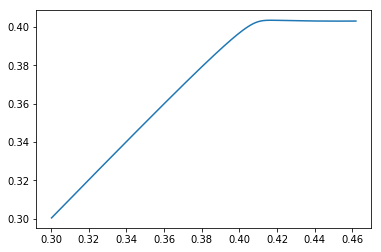

In [6]:
plt.plot(Theta1Gradient, Theta2Gradient)
plt.show()

<IPython.core.display.Javascript object>


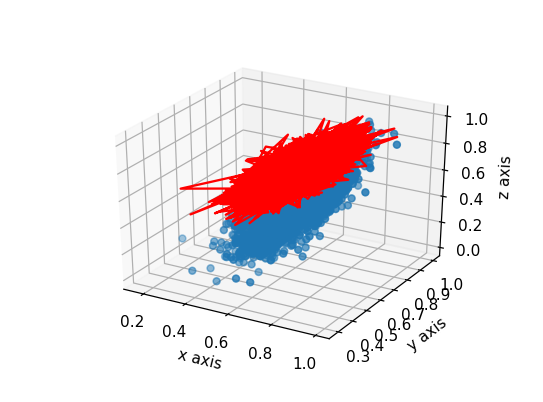

In [25]:
fig = plt.figure()
ax =  fig.add_subplot(111, projection = '3d')

TrainPredictedPrice = (Theta1Old * (TrainAvgAreaIncome**2)) + (Theta2Old * (TrainAvgAreaHouseAge**2)) + Theta1Old
TrainPredictedPrice = TrainPredictedPrice/max(TrainPredictedPrice)
ax.scatter(TrainAvgAreaIncome, TrainAvgAreaHouseAge, TrainPrice)
ax.plot(TrainAvgAreaIncome, TrainAvgAreaHouseAge, TrainPredictedPrice, c = 'r')

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")

plt.show()

# *******************************Testing Phase **************************************'

In [13]:
TestAvgAreaIncome = np.array(Test['Avg. Area Income'])/ max(Test['Avg. Area Income'])
TestAvgAreaHouseAge = np.array(Test['Avg. Area House Age'])/ max(Test['Avg. Area House Age'])
TestPrice = np.array(Test['Price'])/ max(Test['Price'])

<IPython.core.display.Javascript object>


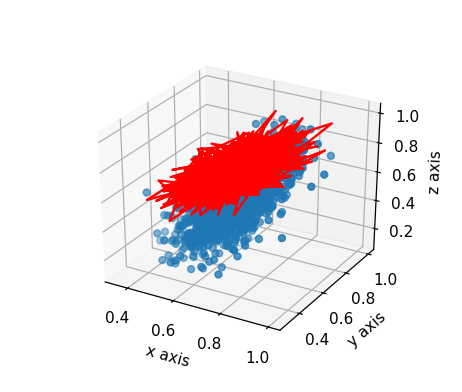

In [19]:
fig = plt.figure()
ax =  fig.add_subplot(111, projection = '3d')

TestPredictedPrice = (Theta1Old * (TestAvgAreaIncome**2)) + (Theta2Old * (TestAvgAreaHouseAge**2)) + Theta1Old
TestPredictedPrice = TestPredictedPrice/max(TestPredictedPrice)
ax.scatter(TestAvgAreaIncome, TestAvgAreaHouseAge, TestPrice)
ax.plot(TestAvgAreaIncome, TestAvgAreaHouseAge, TestPredictedPrice, c = 'r')

ax.set_xlabel("x axis")
ax.set_ylabel("y axis")
ax.set_zlabel("z axis")

plt.show()

In [20]:
TestPriceError = (sum(list(map(lambda x,y : x-y, TestPredictedPrice,TestPrice)))/ len(Test))*100

In [21]:
TestPriceError

16.470158777369434

In [22]:
TrainPriceError = (sum(list(map(lambda x,y : x-y, TrainPredictedPrice,TrainPrice)))/ len(Train))*100

In [23]:
TrainPriceError

20.9398644216135